In [29]:
import pandas as pd

In [30]:
df_movies = pd.read_csv(r"C:\Users\Sruthi\Desktop\hackathon\movies.csv")

### What is the shape of "movies.csv"?

In [31]:
df_movies.shape

(9742, 3)

In [39]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [50]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### What is the shape of "ratings.csv"?

In [32]:
df_rating = pd.read_csv(r"C:\Users\Sruthi\Desktop\hackathon\ratings.csv")

In [33]:
df_rating.shape

(100836, 4)

In [34]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [51]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### How many unique "userId" are available in "ratings.csv"?

In [37]:
df_rating.userId.nunique()

610

### Which movie has recieved maximum number of user ratings?

In [92]:
df_movie_rating = pd.merge(df_movies, df_rating , left_on = 'movieId', right_on = 'movieId', how = 'inner' )

In [93]:
df_movie_rating.shape

(100836, 6)

In [106]:
df_movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [148]:
df_groupby = df_movie_rating.groupby(['title']).size()

In [149]:
df_groupby.idxmax()

'Forrest Gump (1994)'

### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

alternate universe

karate

philosophy

post apocalyptic

In [83]:
df_tag = pd.read_csv(r"C:\Users\Sruthi\Desktop\hackathon\tags.csv")

In [88]:
df_tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [89]:
df_movie_tag = pd.merge(df_movies, df_tag , on= 'movieId' , how = 'inner')

In [90]:
df_movie_tag.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [91]:
df_movie_tag[df_movie_tag['title'] == "Matrix, The (1999)"]

,movieId,title,genres,userId,tag,timestamp
1313,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,martial arts,1457842912
1314,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,sci-fi,1457842899
1315,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474,alternate universe,1137204991
1316,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,philosophy,1424141098
1317,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,post apocalyptic,1424141101


### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"

In [94]:
df_movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [105]:
df_movie_rating.loc[df_movie_rating['title'] == "Terminator 2: Judgment Day (1991)",  'rating'].mean()

3.970982142857143

### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like

In [107]:
df_movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [109]:
distribution = df_movie_rating.loc[df_movie_rating['title'] == "Fight Club (1999)",  'rating']

In [116]:
distribution

49835    5.0
49836    2.0
49837    0.5
49838    2.5
49839    3.5
        ... 
50048    5.0
50049    4.0
50050    5.0
50051    5.0
50052    5.0
Name: rating, Length: 218, dtype: float64

In [117]:
import seaborn as sns

<Axes: xlabel='rating', ylabel='Density'>

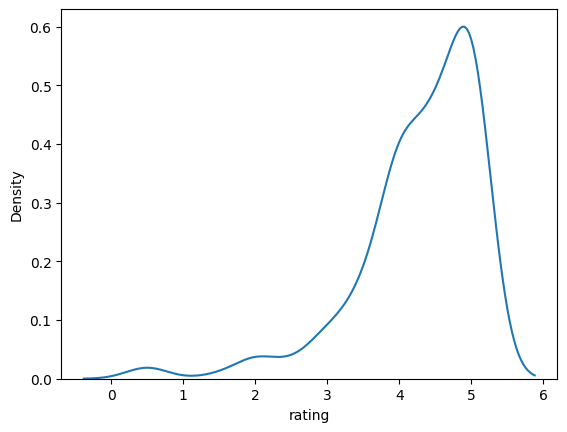

In [118]:
sns.kdeplot(distribution)

### Which movie is the most popular based on  average user ratings?

Answer this question only after applying the above mentioned "Mandatory Operration".

Godfather, The (1972)

Shawshank Redemption, The (1994)

Jumanji (1995)

Wolf of Wall Street, The (2013)

In [151]:
df_movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [172]:
df_group = df_movie_rating.groupby('movieId').agg({'rating': ['count', 'mean']})

In [175]:
df_group.columns = ['rating_count', 'rating_mean']

In [176]:
df_group

,rating_count,rating_mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [177]:
df_merge = pd.merge(df_movies, df_group , left_on = 'movieId', right_on = 'movieId', how = 'inner' )

In [179]:
df_merge.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


In [188]:
filter_data = df_merge.loc[df_merge['rating_count'] > 50]

In [204]:
filter_data.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [191]:
filter_data['rating_mean'].idxmax()

277

In [193]:
filter_data.loc[277]

movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 277, dtype: object

In [229]:
filter_data_sort = filter_data.sort_values(by = 'rating_count', ascending = False)

In [230]:
filter_data_sort.head()

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [215]:
import re

In [219]:
def extract_sci_fi(genres):
    pattern = r'\bSci-Fi\b'
    matches = re.findall(pattern, genres)
    return ', '.join(matches)

In [231]:
filter_data_sort['sci-fi'] = filter_data_sort['genres'].apply(lambda x: extract_sci_fi(x))

In [232]:
filter_data_sort.head()

,movieId,title,genres,rating_count,rating_mean,sci-fi
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134,
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068,
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290,
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,Sci-Fi


In [233]:
filter_data_sort.loc[filter_data_sort['sci-fi'] == 'Sci-Fi' ].head(3)

,movieId,title,genres,rating_count,rating_mean,sci-fi
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,Sci-Fi
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,Sci-Fi
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000,Sci-Fi


You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings.

### Mention the movieId of the movie which has the highest IMDB rating.

In [210]:
df_link = pd.read_csv(r"C:\Users\Sruthi\Desktop\hackathon\links.csv")

In [211]:
df_link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
